# Article abstracts and notes


Here be my descriptions of ideas from AI/ML articles. The goal is to understand them (learn state of the art ideas) and find ones that contain algorithms that I would implement.

## Read

* [Cooperative Inverse Reinforcement Learning](#Cooperative-Inverse-Reinforcement-Learning) - one of the papers mentioned on FHI RL internship page.
* [Safely Interruptible Agents](#Safely-Interruptible-Agents) - one of the papers mentioned on FHI RL internship page.
* [Asynchronous Methods for Deep Reinforcement Learning](#Asynchronous-Methods-for-Deep-Reinforcement-Learning)
* [Learning the Preferences of Ignorant, Inconsistent Agents](#Learning-the-Preferences-of-Ignorant,-Inconsistent-Agents) - one of the papers mentioned on FHI RL internship page.
* [Learning the Preferences of Bounded Agents](https://stuhlmueller.org/papers/preferences-nipsworkshop2015.pdf) - one of the papers mentioned on FHI RL internship page,

## To Read:

* [Playing Atari with Deep Reinforcement Learning](https://arxiv.org/abs/1312.5602) - some old article with DNN playing atari games - check if maybe it contains some medium difficulty to implement algorithm.
* [Weighted importance sampling for off-policy learning with linear function approximation](https://hadovanhasselt.files.wordpress.com/2015/12/wis_for_off_policy.pdf) - [high priority] implement after sutton
* [Off-policy learning based on weighted importance sampling with linear computational complexity](http://auai.org/uai2015/proceedings/papers/165.pdf) -[low priority] to implement after sutton  (might be easier then above)

***

## Cooperative Inverse Reinforcement Learning

Article can be found [here](http://www.cs.utexas.edu/users/sniekum/classes/RLFD-F16/papers/CIRL.pdf).

### Main Ideas

It's better to teach the agent cos he's more capable than you.

### Coding

TOWRITE
 
***

## Safely Interruptible Agents

Article can be found [here](https://intelligence.org/files/Interruptibility.pdf).

### Main ideas

Agents that decide if they are interrupted with some probability will converge to optimal policy, but they will do the wrong thing infinitely many times. (Which sucks, but still we at least have some chance of interrupting them.)

## Asynchronous Methods for Deep Reinforcement Learning

Article can be found [here](https://arxiv.org/abs/1602.01783).

### Main ideas

Paper presents multithreaded, asynchronous variants of:
* one step Sarsa and Q-learning
* n-step Q-learning
* advantage actor-critic

Ideas:
* asynchronous actor-learners run as multiple CPU threads on single machine,
* the actor-learners are likely to explore different parts of the environment plus one can use different exploration policies with each to maximise diversity. This makes the online updates less correlated and has stability effect similar to experience replay in the DQN algorithm.

### Notes

Notes:
* It turns out that it might be actually better to skip the asynchronicity, as [it doesn't improve the performance](https://blog.openai.com/baselines-acktr-a2c/). 

Implementations:

* It seems to be pretty demanding to implement any of the algorithms from this paper. (Although at some point I need to be able to do this.)

## Learning the Preferences of Ignorant, Inconsistent Agents

Article can be found [here](https://stuhlmueller.org/papers/preferences-aaai2016.pdf).

### Main ideas

**Key problem:** To infer our preferences, even though our behavior may systematically diverge from them. Examples: a person who smokes event though they prefer not to (but are unable to quit) or somebody who would like to eat healthily, but regularly succumbs to temptation of donuts (which they consider unhealthy).

**Proposed solution:** Modeling human biases directly into reasoning about given agent's behaviour. In the proposed solution [hyperbolic discounting](https://en.wikipedia.org/wiki/Hyperbolic_discounting) is used to account for our time inconsistency.

### Details

Imagine a grid-world in which an agent moves around the grid to find a place to eat. 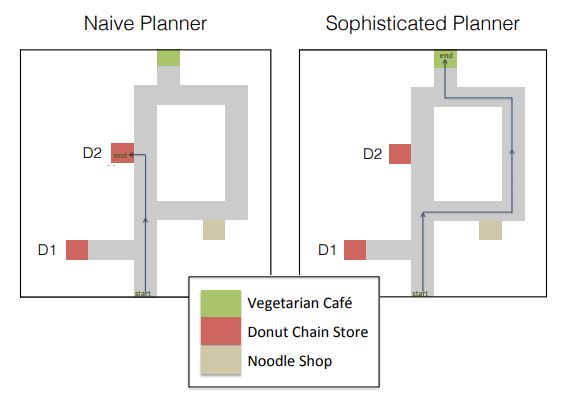

An agent is a tuple: $(p(s), U, Y, k, \alpha)$, where:
* $s\in S$ is a state of the world, it is not described in detail in the paper, but, among others, it consists of things like: noodle place is open, vegetarian place is closed,
* $p(s)$ is agent's belief about which state of the world it is in - it is modeled as a probability distribution over states,
* $U$ is agent's (deterministic) utility function - this is the thing we would like to learn the most by observing agent's actions - $U: S \times A \rightarrow \mathbb{R}$, we assign utilities to actions, $a\in A$, in world states $s$,
* Agent chooses actions stochastically where probability ($C(a;s)$) is proportional to their exponentiated expected utility: $C(a;s) \propto \exp^{\alpha EU_{s}[a]}$ or for discounting agents: $C(a;s) \propto \exp^{\alpha EU_{s,d}[a]}$, where $\alpha$ is noise parameter (the lower it is the more randomly agent behaves). Expected utility is described below.
* $Y$ is a variable that denotes the kind of agent:
    * not discounting agent - as its name suggests it won't discount the utility of future actions regardless of the delay, so its expected utility is: $EU_s[a] = U(s,a) + \mathbb{E}_{s',a'}[EU_s'[a']]$, where $s'$ is a state in which agent ends after choosing action $a$ from state $s$ and $a'$ is action choosen in $s'$,
    * discounting naive agent - it discounts utility of future actions based on the delay $d$: $EU_{s,d}[a] =\frac{1}{1+kd} U(s,a) + \mathbb{E}_{s',a'}[EU_{s',d+1}[a']]$, where $k$ is a discount rate (part of agent's description (see tuple above)). 
    Because of the discounting the utility of actions changes with time. It is possible then that an agent who decided to go to vegetarian cafe will change its decision once it is next to donut store. This is shown on the left in the image above. If the agent wanted to go to donut place it could've gone to the closer one. That is why it is called the naive agent - it doesn't take into account that the utility of its action changes and ends up doing things that it didn't plan.    
    * discounting sophisticated agent - its expected utility is also discounted like in naive case, but it chooses future actions $a'$ as if the delay $d$ was $0$. In a sense, it knows that its future self will look at the immediate utility of actions rather then at the utilities they have now. Thanks to that it can for example choose a different path to vegetarian restaurant. It knows that it future self would end up in donut place if it went next to it.
* $k$ is the discount rate (see dicounting naive agent description).
* $\alpha$ is the noise parameter described above together with actions.

Given a sequence of actions done by some agent, we want to infer its preferences. In the paper this is translated into: given a sequence of actions done by some agent update your probability distribution over agent tuples. We start with uniform distribution (zero knowledge) and do bayesian updates with consecutive actions. The model described above will be considered good if probability mass after the updates concentrates on the kinds of agents that a human would infer after seeing the same.

### Results

According to experiments the model performs well, which means that it assigns high probabilities to the kind of agents that humans describe after seeing the same actions. 

For example, after seeing actions from the image above the model as well as human subjects would rate highly explanations of giving in to temptation (in case of naive planner) or avoiding temptation (in case of sophisticated one). The result holds for more complex scenarios: 
* inference with uncertainty - agent might have inaccurate beliefs, for example it might 'think' that the noodle place is open when in fact it's closed, 
* inference from multiple episodes - even though in two out of three cases agent chooses donuts both human subjects and the model assign high probability to the case where the vegetarian place is preferred (among others, they generally agree over variety of explanations).

**Conclusion:** If we want to be able to delegate some of our decisions to ai systems then it is necessary that they are able to learn our preferences despite inconsistencies in our behaviour. The result presented in the paper shows that modeling our biases directly is a feasible direction of research.




# Learning the Preferences of Bounded Agents 
The article can be found [here](https://stuhlmueller.org/papers/preferences-nipsworkshop2015.pdf).

**Main idea:**

We want to infer human preferences (utility function) given their actions. The problem is that we tend to deviate from our preferences in systematic ways. For example:
* a person may be smoking regularly even though they prefer not to and feel regretful,
* a person eats regularly at a given restaurant even though there exist different one they would prefer if only they tried it (and trying new things is less painful then they imagine).

If we assume that we are optimal decision makers then in the above cases we would wrongly infer preference for smoking and the given restaurant.

The paper proposes a solution which is directly modeling human biases into reasoning about their preferences. It considers following ones: hyperbolic discounting, monte carlo approximations of expected utility, myoptic agents, bounded value of information. The main result is showing how models of these biases affect expected utility predictions based on series of observed actions.

**The paper basically shows how to model human biases so that it works as expected when we use it to infer preferences.**

The work done in this paper seems to be a continuation of [Learning the Preferences of Ignorant, Inconsistent Agents](https://stuhlmueller.org/papers/preferences-aaai2016.pdf) as it presents the same approach to the same problem but with more models of biases.

**Details**

Agent is a tuple of functions (including utility), probability distributions and parameters that describe how it makes decisions. We consider space of all possible such tuples and start with uniform distrbution over it (since we don't know which agent we are observing every one is equally likely). The experiments are bayesian updates of this distribution based on observed sequence of actions.

All agents take actions probabilistically with some level of noise (the distribution is proportional to exponentiated expected utilities).

Three examples of preference inferences are presented. In each a subspace of agents is considered to contrast assumption of optimality with assumption of given bias. 

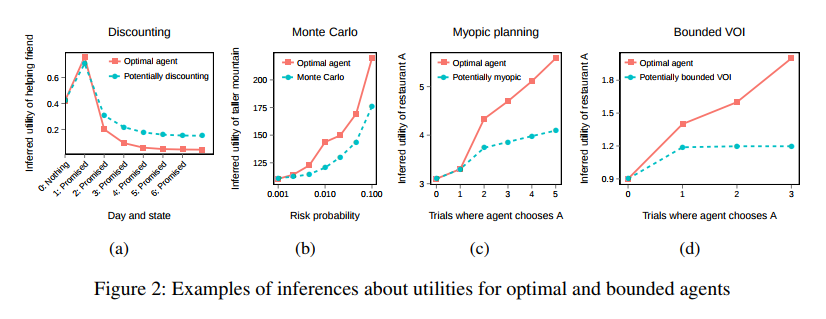

In the figure 2:

(a) **Procrastination ~ hyperbolic discounting:** An agent promises to comment on its friend paper, but fails due to procrastination. Optimal agent would either promise and do the work straight away or not promise at all (it can still promise and not do due to possible noise in actions). Hyperbolic discouting agent may procrastinate depending on the utility of helping and discounting rate. In figure 2a we notice that with assumption of optimality we quickly infer that the utility of helping is zero, while when we allow discounting then even though the agent doesn't help, it may have significant positive preference for it.

(b) **Neglect of low probability events ~ Monte Carlo approximation:** We observe John who is hiking and has to choose between climbing up a tall peak or short peak. The tall one is more spectacular, but reaching it comes with small probability of disaster. If John is optimal agent then he can properly take the risk into account. If he is biased, on the other hand, he may not. One way to model it is to assume that John does Monte Carlo estimation of expected utility. It means that he simulates the hike N times (where N is intrinsic property of John) and looks at the average utility of the outcome. For small Ns and small probability of disaster it is highly likely that in all the simulations disaster will not occur, which means it will not be taken into account. When we observe that John goes directly to the tall peak, assuming he's MC agent, we will infer lower utility for it then in case of optimality. This is shown in figure 2b. This agrees with our intuition that if John is biased, he will be willing to risk disaster for smaller utility (as he doesn't take the risk into account). 

(c) **Failure to explore ~ myoptic agent:** Assume an agent will be at a meeting every month and will have to choose a restaurant for lunch from A and B (which are nearby). We observe that she chooses A with each following month. If she is optimal then this means a high utility for A. It is also possible she doesn't realize the value of exploration and is unwilling to try B even if it would be better in long term (the prior is that most restaurants are bad). This can be modeled as setting to zero utilities that are further into the future then given time horizon. Agent who behaves in such way is called myoptic. In the figure 2c we can see inferred utilities for A for optimal agent vs myoptic one with time horizon 1 (all the utilities except for the ones 1 step ahead are zero).

(d) **Failure to explore ~ bounded value of information agent:** Bounded value of information agent does optimal computation of expected utility up to some distance into the future - $k_{voi}$ - after which it assumes it won't learn anything new (it won't change it's mind due to new information). In the scenario from (c) such agent with $k_{voi} > 0$ would behave optimally (as choosing between A and B is only looking 1 step into the future). That is why a slightly modified scenario is considered. Now A is the only nerby restaurant, but there are two neighborhoods containing two restarants each. The agent can decide to ask a local which neighborhood has the best restaurants (one step into the future) and once it is there it can ask another local for which restaurant to choose (second step). A bounded VOI agent with $k_{voi} = 1$ will behave suboptimally on this problem. In the figure 2d we can see that it would continue using restaurant A for smaller utility than in optimal case.